In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=pd.read_csv(r"C:\Users\keerthy\Desktop\internship files-asli\internship files\cars-data.csv")
dataset.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,h8,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,dohc,4,130,mpfi,9.0,21,27,16500
1,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,ohcv,6,152,mpfi,9.0,19,26,16500
2,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,109,mpfi,10.0,24,30,13950
3,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,ohc,5,136,mpfi,8.0,18,22,17450
4,2,audi,gas,std,sedan,fwd,front,99.8,177.3,66.3,53.1,ohc,5,136,mpfi,8.5,19,25,15250


In [3]:
dataset.isnull().any()

symboling            False
make                 False
fuel-type            False
aspiration           False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
h8                   False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
compression-ratio    False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['make'] =le.fit_transform(dataset['make'])
dataset['fuel-type'] =le.fit_transform(dataset['fuel-type'])
dataset['aspiration'] =le.fit_transform(dataset['aspiration'])
dataset['body-style'] =le.fit_transform(dataset['body-style'])
dataset['drive-wheels'] =le.fit_transform(dataset['drive-wheels'])
dataset['engine-location'] =le.fit_transform(dataset['engine-location'])
dataset['engine-type'] =le.fit_transform(dataset['engine-type'])
dataset['fuel-system'] =le.fit_transform(dataset['fuel-system'])

In [5]:
dataset.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,h8,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg,price
0,3,0,1,0,0,2,0,88.6,168.8,64.1,48.8,0,4,130,5,9.0,21,27,16500
1,1,0,1,0,2,2,0,94.5,171.2,65.5,52.4,4,6,152,5,9.0,19,26,16500
2,2,1,1,0,3,1,0,99.8,176.6,66.2,54.3,2,4,109,5,10.0,24,30,13950
3,2,1,1,0,3,0,0,99.4,176.6,66.4,54.3,2,5,136,5,8.0,18,22,17450
4,2,1,1,0,3,1,0,99.8,177.3,66.3,53.1,2,5,136,5,8.5,19,25,15250


In [6]:
x=dataset.iloc[:,:18].values

In [7]:
x

array([[ 3. ,  0. ,  1. , ...,  9. , 21. , 27. ],
       [ 1. ,  0. ,  1. , ...,  9. , 19. , 26. ],
       [ 2. ,  1. ,  1. , ..., 10. , 24. , 30. ],
       ...,
       [-1. , 21. ,  1. , ...,  8.8, 18. , 23. ],
       [-1. , 21. ,  0. , ..., 23. , 26. , 27. ],
       [-1. , 21. ,  1. , ...,  9.5, 19. , 25. ]])

In [8]:
y=dataset.iloc[:,-1].values

In [9]:
y

array([16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430,
       16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,
        6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,  8921,
       12964,  6479,  6855,  5399,  6529,  7129,  7295,  7295,  7895,
        9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250, 35550,
       36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845, 13645,
       15645,  8845,  8495, 10595, 10245, 10795, 11245, 18280, 18344,
       25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400, 16503,
        5389,  6189,  6669,  7689,  9959,  8499, 12629, 14869, 14489,
        6989,  8189,  9279,  9279,  5499,  7099,  6649,  6849,  7349,
        7299,  7799,  7499,  7999,  8249,  8949,  9549, 13499, 14399,
       13499, 17199, 19699, 18399, 11900, 13200, 12440, 13860, 15580,
       16900, 16695, 17075, 16630, 17950, 18150,  5572,  7957,  6229,
        6692,  7609,  8921, 12764, 22018, 32528, 34028, 37028,  9295,
        9895, 11850,

In [10]:
x[:,1].max()

21.0

In [11]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
ct = ColumnTransformer([("make", OneHotEncoder(), [1])], remainder = 'passthrough')
x = ct.fit_transform(x) 

x = x[:,1:]
x

array([[ 0. ,  0. ,  0. , ...,  9. , 21. , 27. ],
       [ 0. ,  0. ,  0. , ...,  9. , 19. , 26. ],
       [ 1. ,  0. ,  0. , ..., 10. , 24. , 30. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  8.8, 18. , 23. ],
       [ 0. ,  0. ,  0. , ..., 23. , 26. , 27. ],
       [ 0. ,  0. ,  0. , ...,  9.5, 19. , 25. ]])

In [12]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
ct1 = ColumnTransformer([("body-style", OneHotEncoder(), [24])], remainder = 'passthrough')
x = ct1.fit_transform(x) 

x = x[:,1:]
x

array([[ 0. ,  0. ,  0. , ...,  9. , 21. , 27. ],
       [ 0. ,  1. ,  0. , ...,  9. , 19. , 26. ],
       [ 0. ,  0. ,  1. , ..., 10. , 24. , 30. ],
       ...,
       [ 0. ,  0. ,  1. , ...,  8.8, 18. , 23. ],
       [ 0. ,  0. ,  1. , ..., 23. , 26. , 27. ],
       [ 0. ,  0. ,  1. , ...,  9.5, 19. , 25. ]])

In [13]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
ct2 = ColumnTransformer([("drive-wheels", OneHotEncoder(), [28])], remainder = 'passthrough')
x = ct2.fit_transform(x) 

x = x[:,1:]
x 


array([[ 0. ,  1. ,  0. , ...,  9. , 21. , 27. ],
       [ 0. ,  1. ,  0. , ...,  9. , 19. , 26. ],
       [ 1. ,  0. ,  0. , ..., 10. , 24. , 30. ],
       ...,
       [ 0. ,  1. ,  0. , ...,  8.8, 18. , 23. ],
       [ 0. ,  1. ,  0. , ..., 23. , 26. , 27. ],
       [ 0. ,  1. ,  0. , ...,  9.5, 19. , 25. ]])

In [14]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
ct3 = ColumnTransformer([("engine-type", OneHotEncoder(), [35])], remainder = 'passthrough')
x = ct3.fit_transform(x) 

x = x[:,1:]
x 

array([[ 0. ,  0. ,  0. , ...,  9. , 21. , 27. ],
       [ 0. ,  0. ,  0. , ...,  9. , 19. , 26. ],
       [ 0. ,  1. ,  0. , ..., 10. , 24. , 30. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  8.8, 18. , 23. ],
       [ 0. ,  1. ,  0. , ..., 23. , 26. , 27. ],
       [ 0. ,  1. ,  0. , ...,  9.5, 19. , 25. ]])

In [15]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
ct4 = ColumnTransformer([("no-of-clyinders", OneHotEncoder(), [40])], remainder = 'passthrough')
x = ct4.fit_transform(x) 

x = x[:,1:]
x 


array([[ 0. ,  1. ,  0. , ...,  9. , 21. , 27. ],
       [ 0. ,  0. ,  0. , ...,  9. , 19. , 26. ],
       [ 0. ,  1. ,  0. , ..., 10. , 24. , 30. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  8.8, 18. , 23. ],
       [ 0. ,  0. ,  0. , ..., 23. , 26. , 27. ],
       [ 0. ,  1. ,  0. , ...,  9.5, 19. , 25. ]])

In [16]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
ct5 = ColumnTransformer([("fuel-system", OneHotEncoder(), [47])], remainder = 'passthrough')
x = ct5.fit_transform(x) 

x = x[:,1:]
x 


array([[ 0. ,  0. ,  0. , ...,  9. , 21. , 27. ],
       [ 0. ,  0. ,  0. , ...,  9. , 19. , 26. ],
       [ 0. ,  0. ,  0. , ..., 10. , 24. , 30. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  8.8, 18. , 23. ],
       [ 0. ,  0. ,  1. , ..., 23. , 26. , 27. ],
       [ 0. ,  0. ,  0. , ...,  9.5, 19. , 25. ]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)



In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:

ypred = regressor.predict(X_test)
ypred


array([ 6584.89972147, 10943.27216421, 11373.36292492, 15604.83703381,
        9533.98265371, 10599.0922972 , 19716.76432947,  5661.8709036 ,
       26346.98949039,  7547.16215346, 13613.82479615,  9924.03066129,
        9265.60324609,  8978.18158814, 13315.10682939, 20636.58461224,
        7198.91976684, 13470.10808462, 10009.8098708 ,  5019.24950421,
        8239.54310186,  5396.74461013, 33904.83635573,  7240.43906663,
       11329.2927062 , 33525.00179424,  9533.98265371,  8646.39088122,
       33525.00179424, 32250.        ,  1181.4341028 , 11535.09040648,
        7334.62384705, 11373.36292492,  6367.5291106 , 16090.02678408,
       13221.34730407, 15017.43300985,  9582.20479562, 17662.73737793,
        5835.19899082, 30086.60978917,  9956.30849111, 15322.57978234,
       10684.88492691, 28011.97965978, 20148.59108045,  6907.69090941,
        6138.36686278, 10788.88427461])

In [20]:
y_test 


array([ 6575,  9988, 15580, 14399,  7775,  9495, 17710,  6338, 24565,
        7198, 18280,  9295,  8195,  7788, 14489, 23875,  7295, 15510,
        8845,  6669,  9995,  5348, 36000,  8238, 11245, 34028,  7995,
        9980, 32528, 35550,  5151,  8845,  8778, 16630,  6229, 12940,
       15040, 15250,  9279, 13860,  7053, 31600,  8921, 18150,  8948,
       25552, 16430,  7689,  7609,  8013], dtype=int64)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.9343277511386796

In [22]:
import pickle

In [23]:
with open('regressor_pickle','wb') as f:
    pickle.dump(regressor,f)

In [24]:
with open('regressor_pickle','rb') as f:
    mp = pickle.load(f)

In [25]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [26]:
joblib.dump(regressor,'regressor_joblib')

['regressor_joblib']

In [27]:
mj = joblib.load('regressor_joblib')

In [28]:
import seaborn as sns
%matplotlib inline

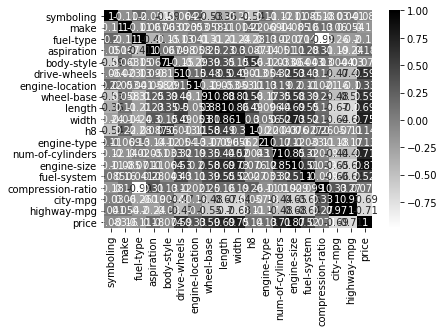

In [29]:
sns.heatmap(dataset.corr(),cmap='binary',annot=True)

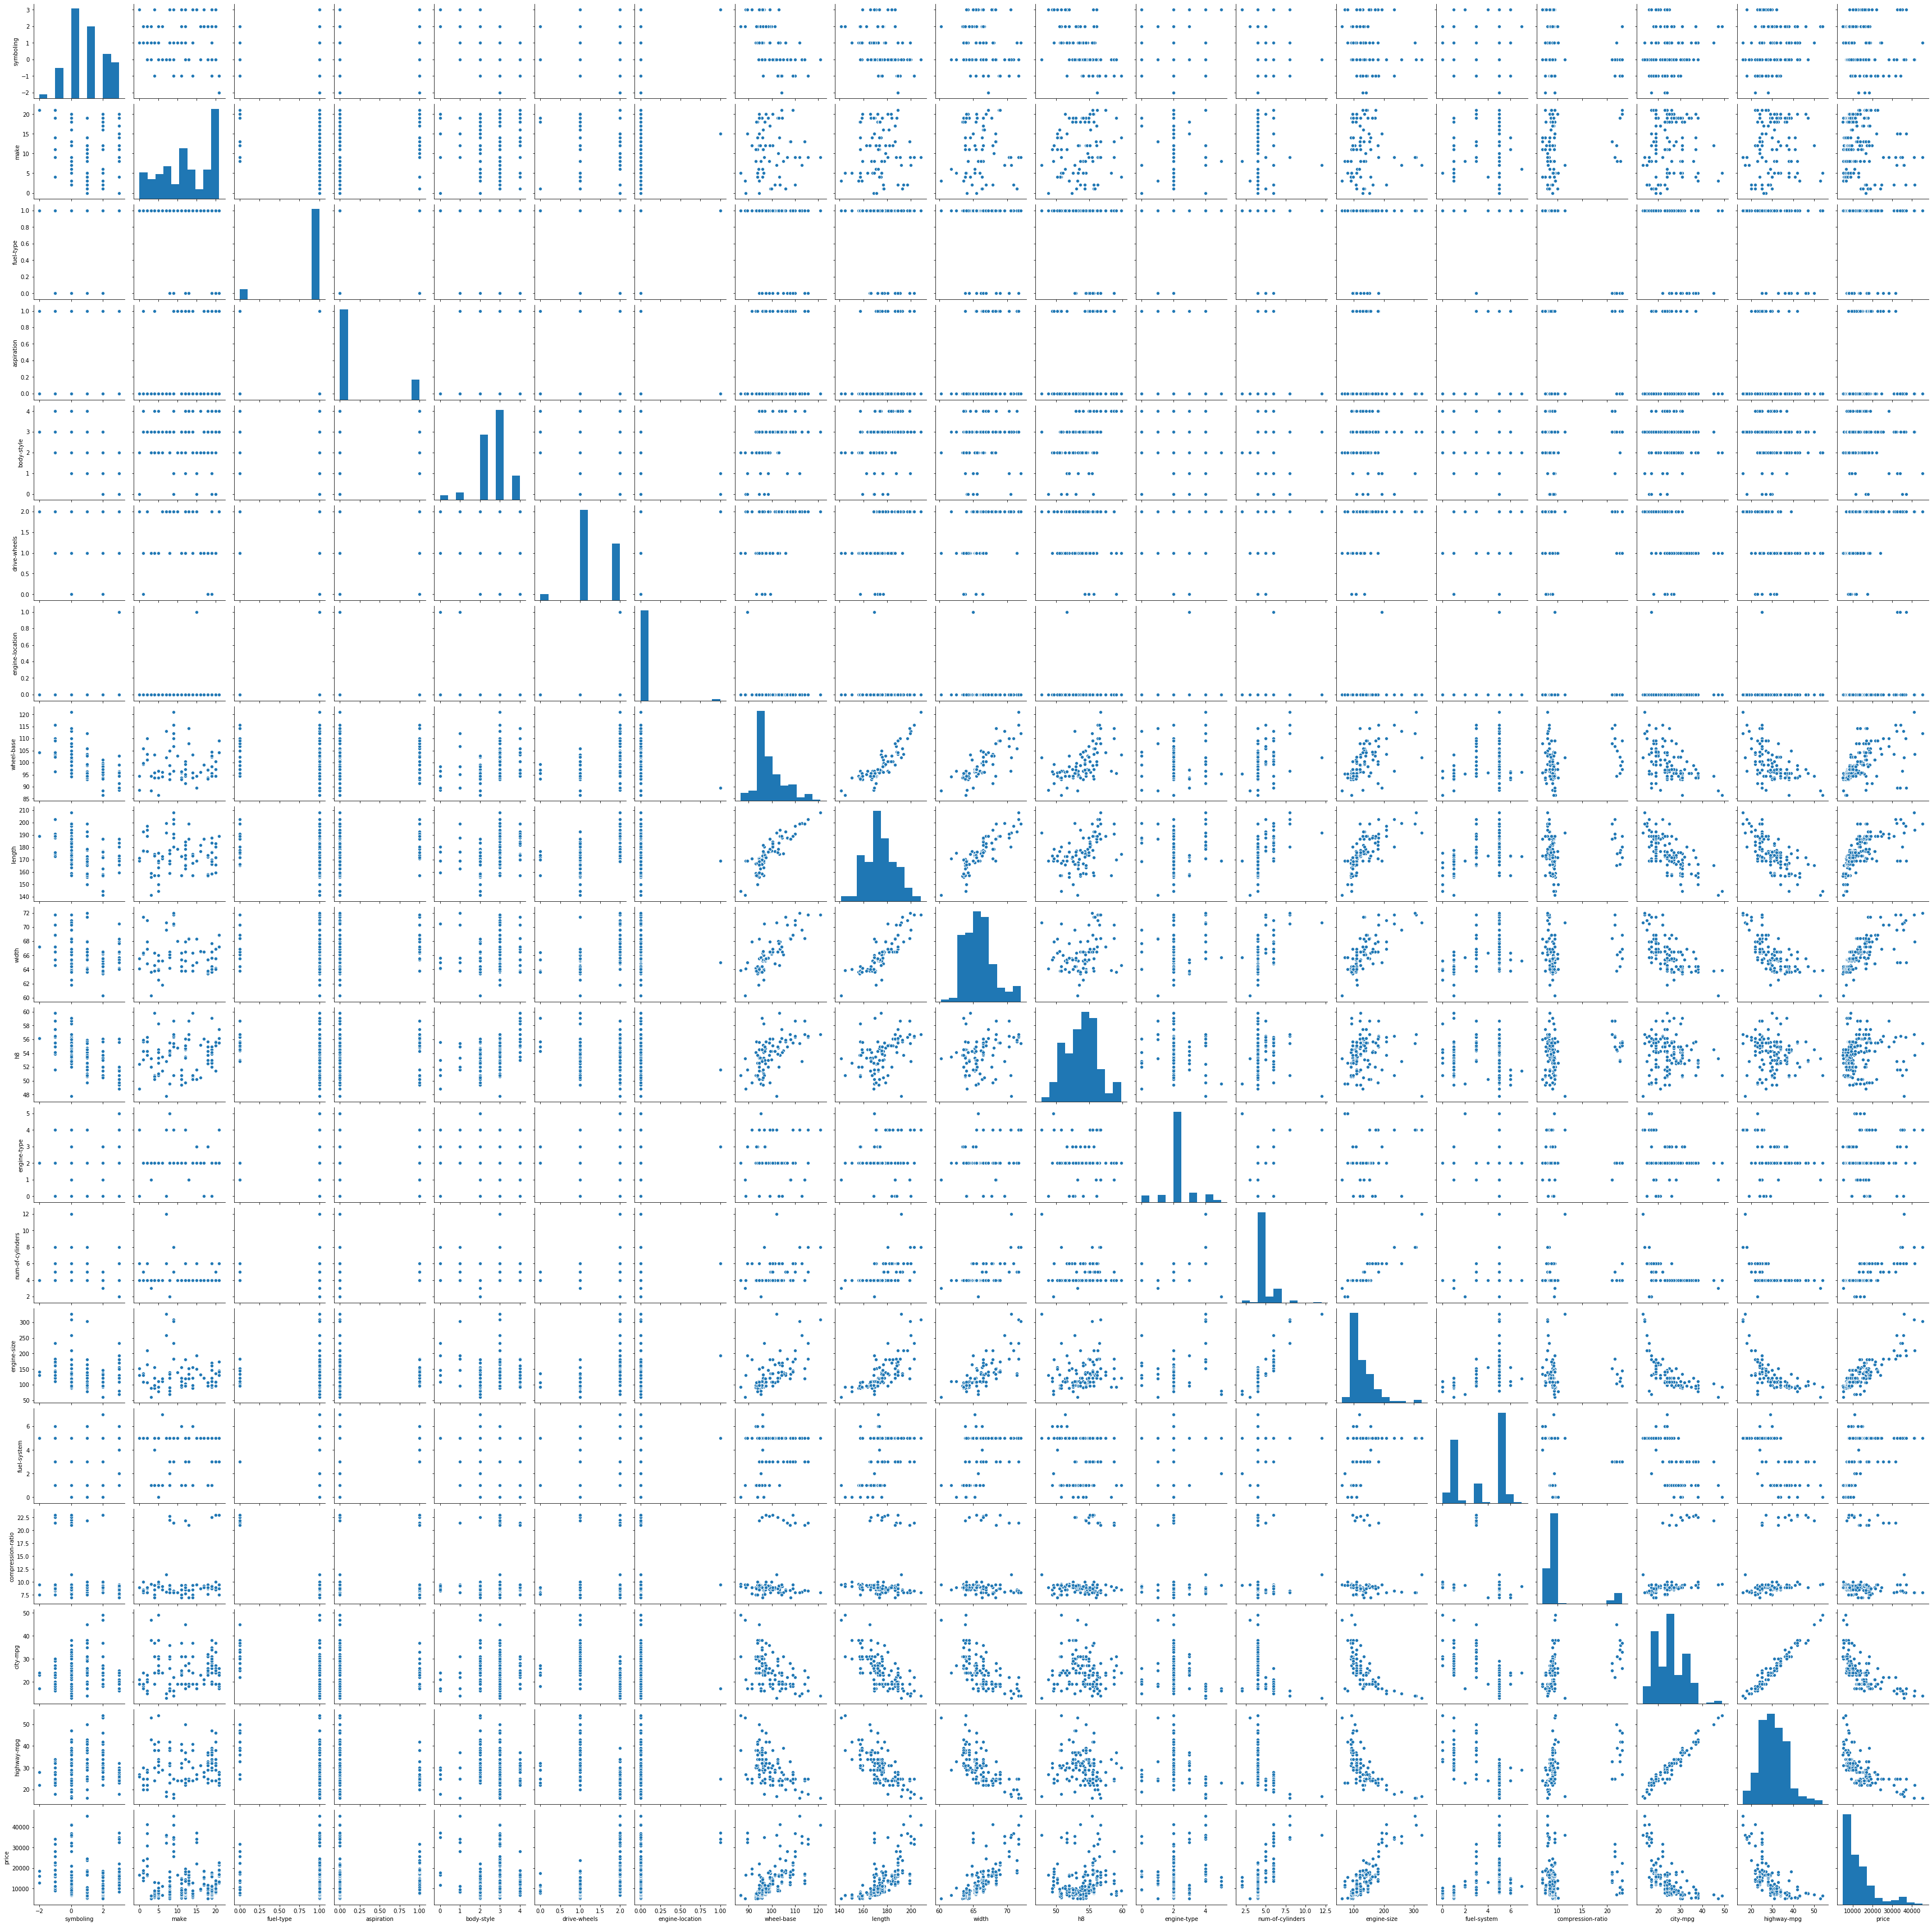

In [34]:
sns.pairplot(dataset)

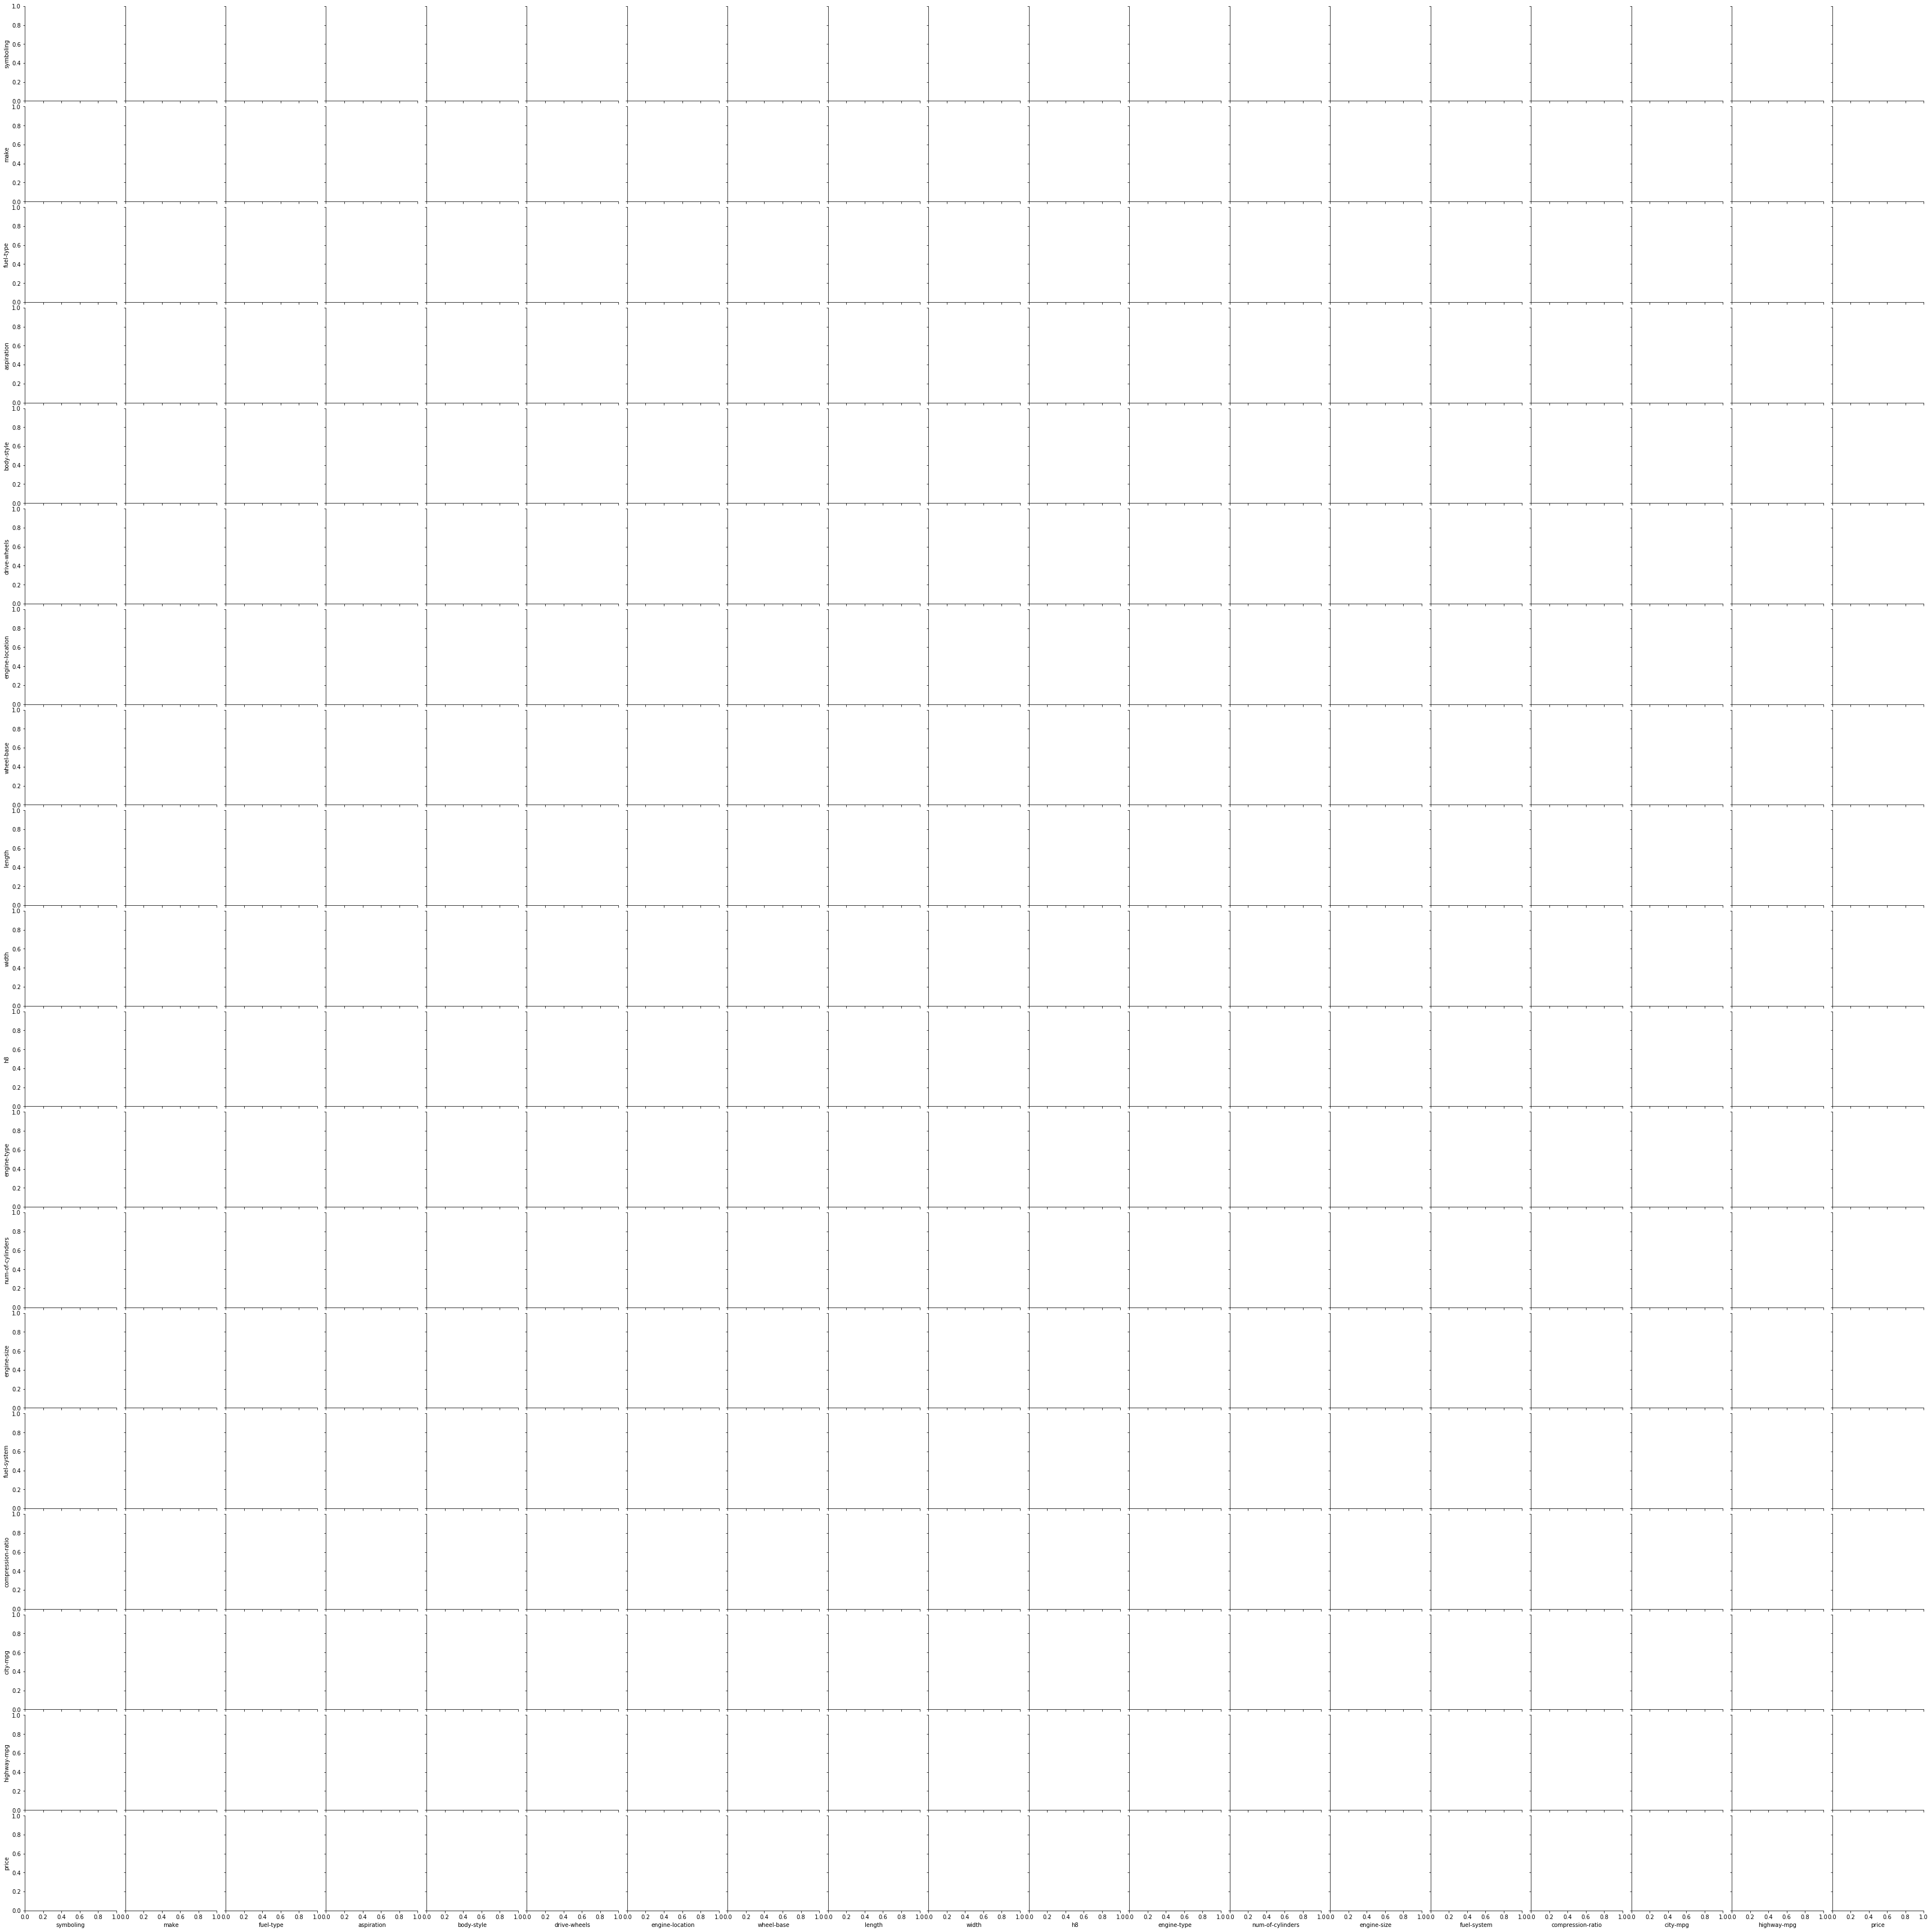

In [35]:
sns.PairGrid(dataset)

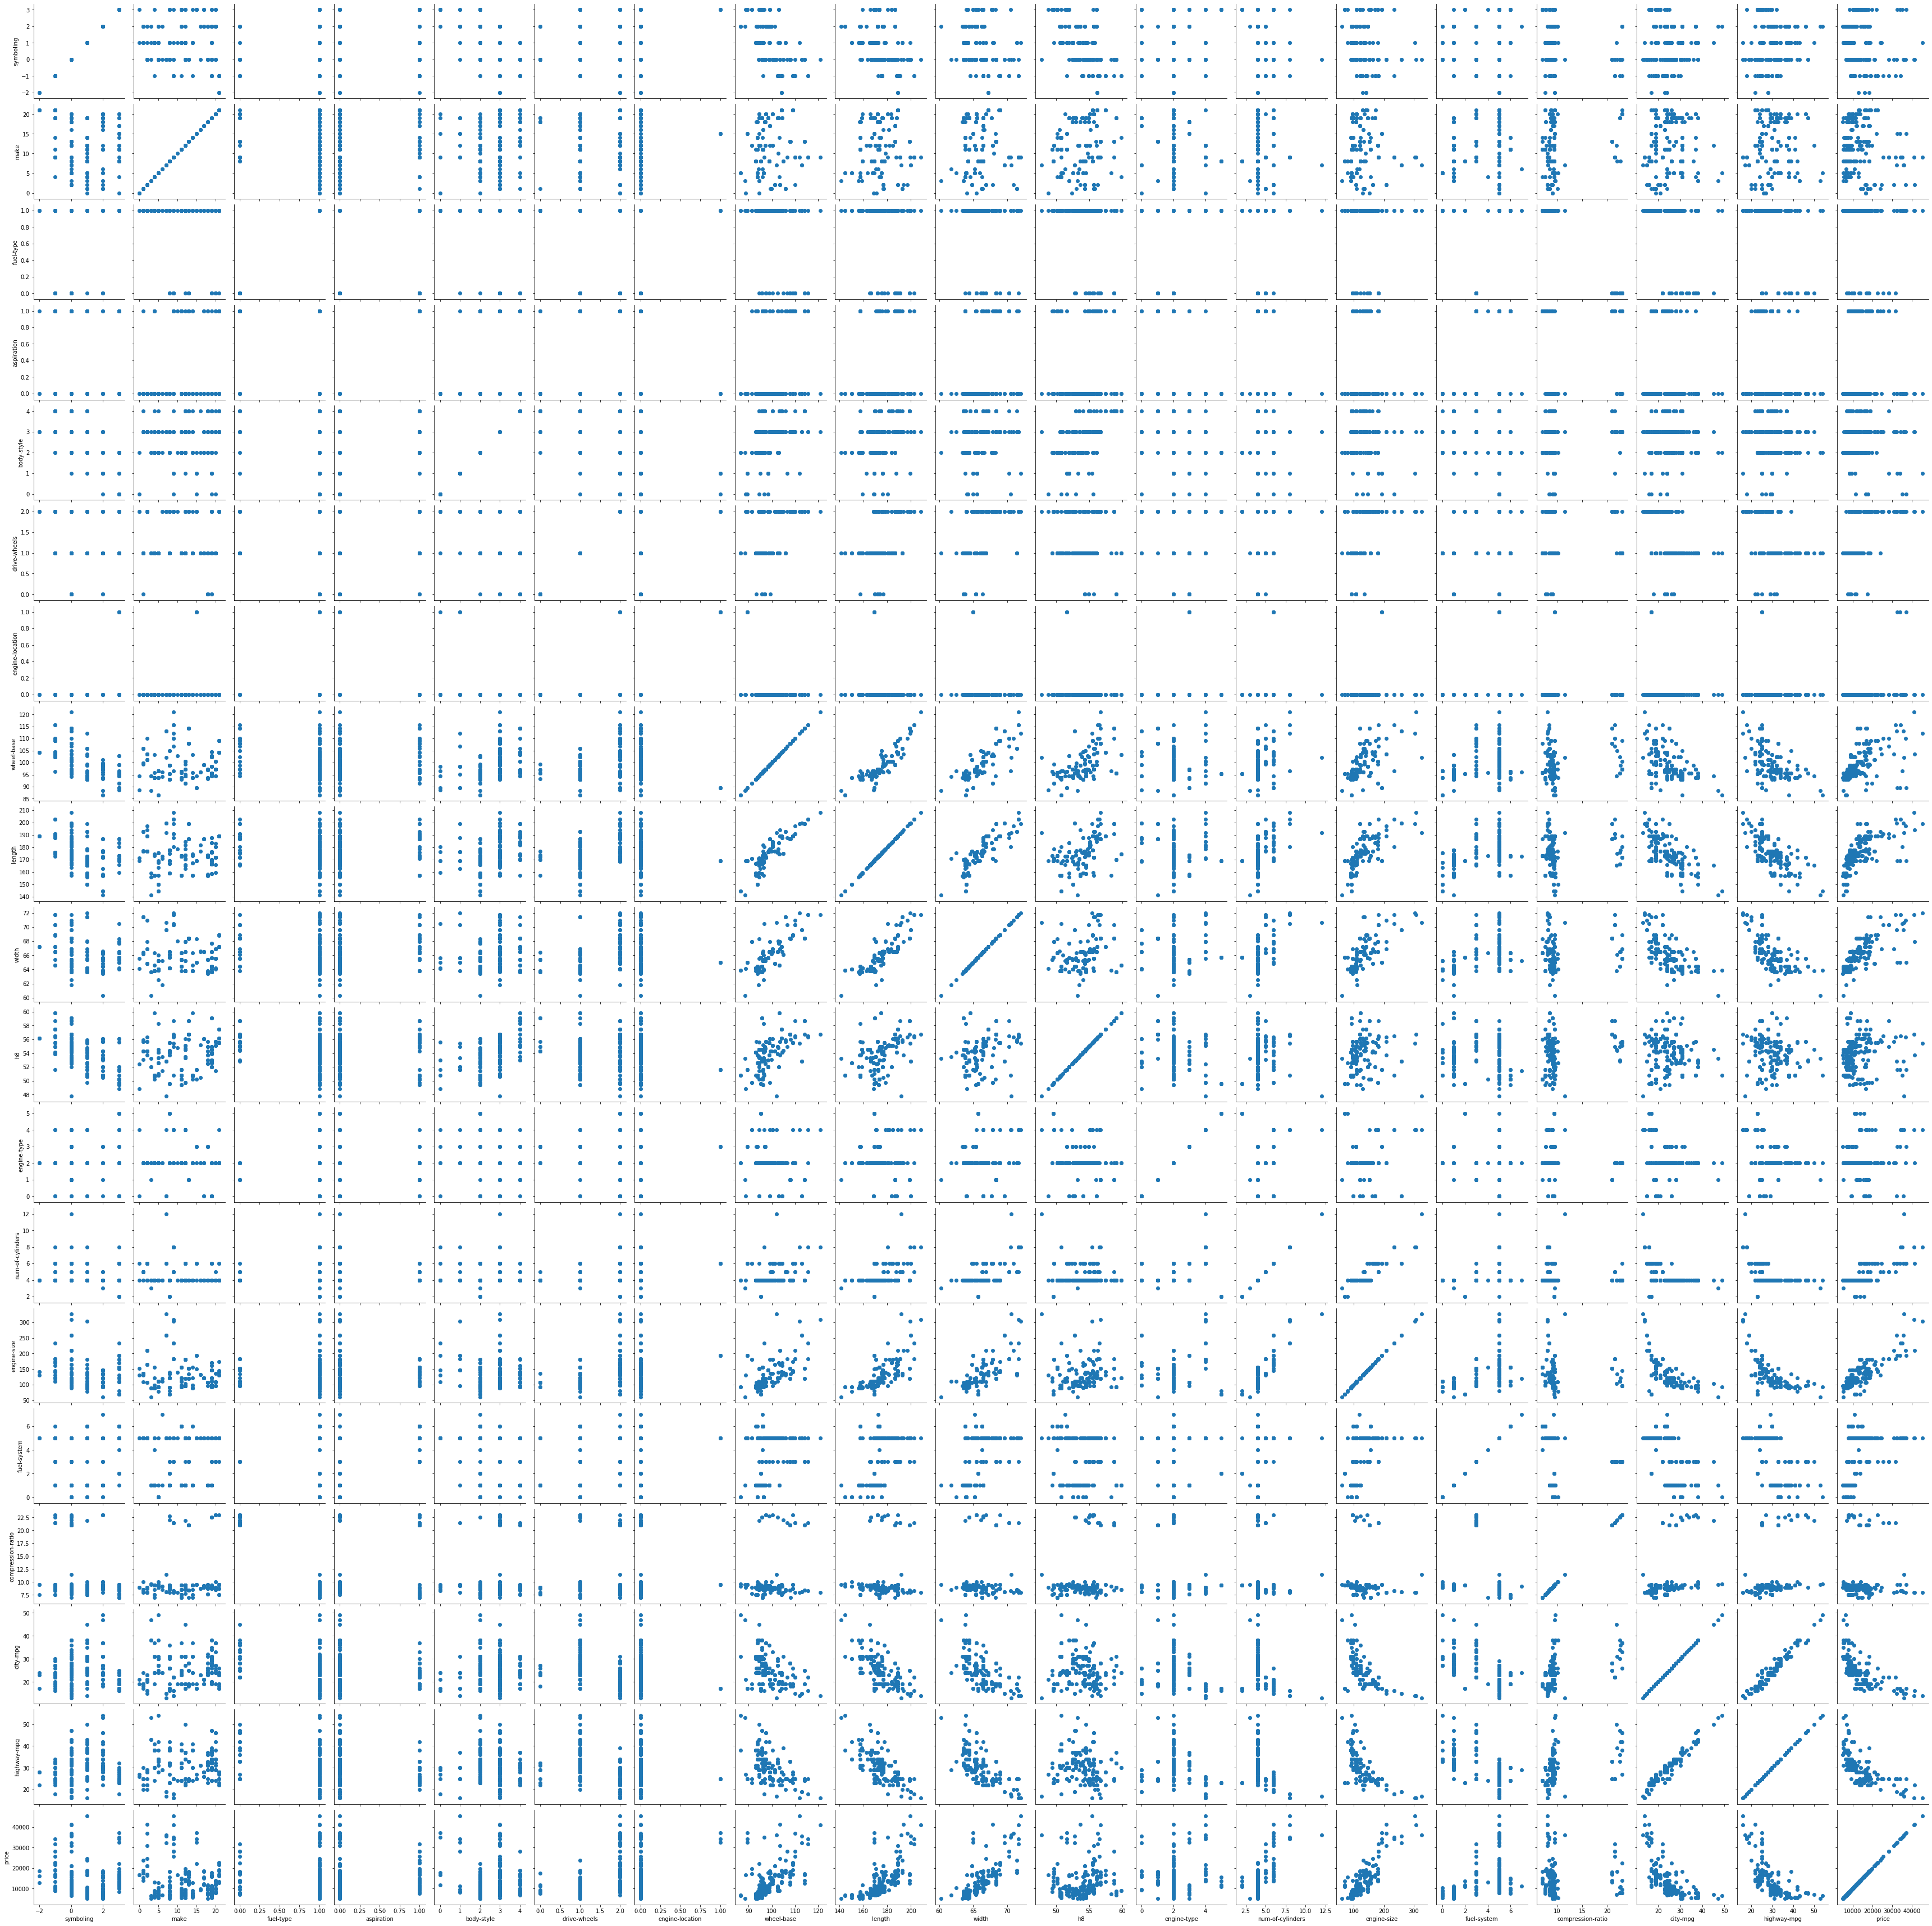

In [36]:
g = sns.PairGrid(dataset)
g.map(plt.scatter)

In [37]:
ypred1 = regressor.predict([[1,0,0,0,0,0,0, 0,1,0,0,0,0, 0,1,0,0,0, 1,0, 1,0,0,0,
                           0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
                           3, 1, 1, 0, 88.6, 176.8, 64.8, 48.8, 98, 7.6, 24, 27]])
ypred1


array([17215.37855413])